In [6]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram
using LookupTable

In [10]:
include("ReMETI_Vertical_Vibration.jl")

73235

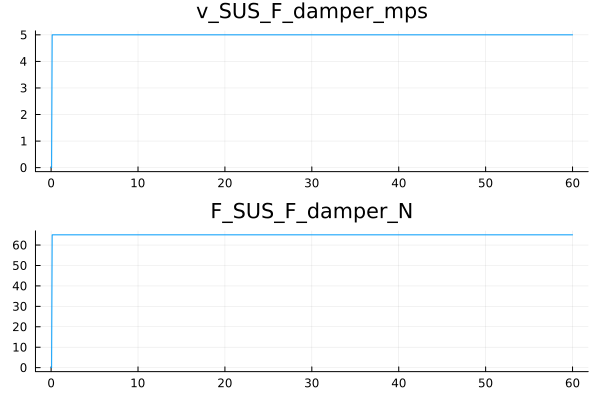

Test Summary: |Time
front_damper2 | None  0.2s
SUS_F_PNT2: Error During Test at /workspaces/JuliaMBD-sample/newww/Reunittests.jl:472
  Got exception outside of a @test
  KeyError: key :v_VL2SUS_F_mps2 not found
  Stacktrace:
    [1] getindex(h::Dict{Symbol, Any}, key::Symbol)
      @ Base ./dict.jl:484
    [2] getport(b::SubSystemBlock, s::Symbol)
      @ JuliaMBD ~/.julia/packages/JuliaMBD/ZFbOr/src/_simpleblock.jl:60
    [3] (::var"#testblock#268")()
      @ Main /workspaces/JuliaMBD-sample/newww/Reunittests.jl:480
    [4] macro expansion
      @ ~/.julia/packages/JuliaMBD/ZFbOr/src/_ode.jl:9 [inlined]
    [5] macro expansion
      @ /workspaces/JuliaMBD-sample/newww/Reunittests.jl:491 [inlined]
    [6] macro expansion
      @ /usr/local/julia/share/julia/stdlib/v1.9/Test/src/Test.jl:1498 [inlined]
    [7] top-level scope
      @ /workspaces/JuliaMBD-sample/newww/Reunittests.jl:473
    [8] include(fname::String)
      @ Base.MainInclude ./client.jl:478
    [9] top-level scope
      @

LoadError: LoadError: Some tests did not pass: 0 passed, 0 failed, 1 errored, 0 broken.
in expression starting at /workspaces/JuliaMBD-sample/newww/Reunittests.jl:472

In [11]:
include("Reunittests.jl")

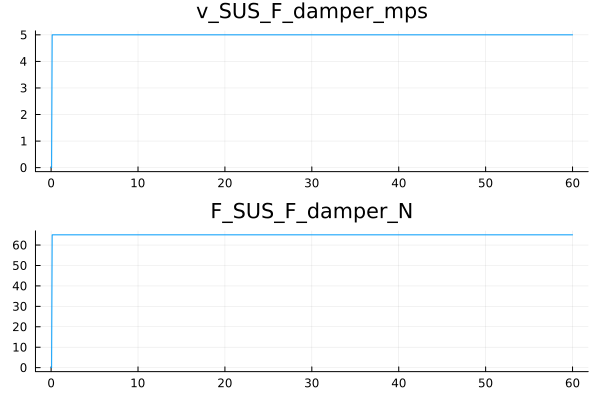

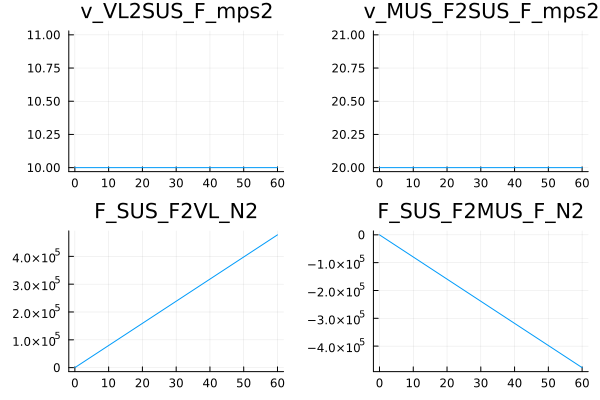

Test Summary: |Time
front_damper2 | None  0.4s


Test Summary: |Time
SUS_F_PNT2    | None  0.3s


In [5]:
include("Reunittests.jl")

  0.403864 seconds (185.53 k allocations: 8.760 MiB)


  3.707061 seconds (4.64 M allocations: 365.759 MiB, 76.73% compilation time)
  0.003452 seconds (1.33 k allocations: 178.172 KiB)


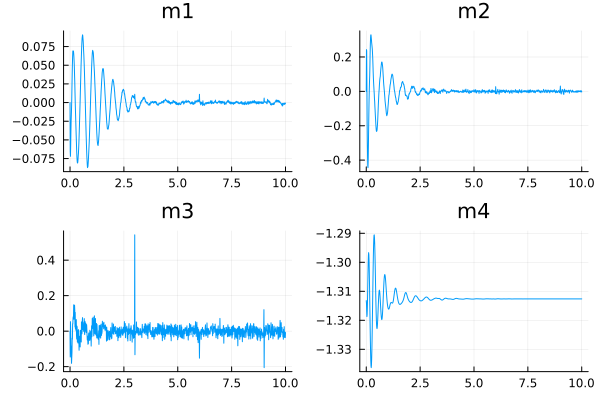

In [68]:
@model sim begin
    @block begin
        b = Vehicle()
        m1 = From(tag=:v_VL_mps)
        m2 = From(tag=:omg_VL_pitch_rate_radps)
        m3 = From(tag=:v_MUS_R2SUS_R_mps)
        m4 = From(tag=:L_SUS_R_stroke_m)
        m5 = From(tag=:v_MUS_F2SUS_F_mps)
        m6 = From(tag=:L_SUS_F_stroke_m)
        m7 = From(tag=:a_HM_F_neck_rad)
        m8 = From(tag=:a_HM_HD_R_neck_rad)
    end
    @scope begin
        m1.out => m1
        m2.out => m2
        m5.out => m3
        m8.out => m4
    end
end
@time m = @compile_derivative sim()
@time result = simulate(m, tspan=[0,10])
@time plot(result, layout=(2,2))


  0.691941 seconds (393.41 k allocations: 22.706 MiB, 48.64% gc time, 22.28% compilation time)


┌ Warning: dt(8.881784197001252e-16) <= dtmin(8.881784197001252e-16) at t=0.000271672396216905, and step error estimate = 95.9335484779264. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /root/.julia/packages/SciMLBase/UhWaH/src/integrator_interface.jl:599


  0.943498 seconds (2.41 M allocations: 176.176 MiB, 8.20% gc time, 93.66% compilation time)
  0.026857 seconds (7.94 k allocations: 629.089 KiB, 49.10% compilation time)


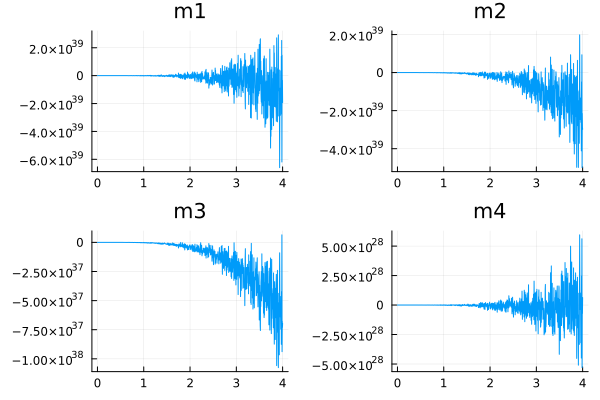

In [5]:
@model sim begin
    @block begin
        b = Vehicle()
        m1 = From(tag=:v_VL_mps)
        m2 = From(tag=:omg_VL_pitch_rate_radps)
        m3 = From(tag=:v_MUS_R2SUS_R_mps)
        m4 = From(tag=:L_SUS_R_stroke_m)
        m5 = From(tag=:v_MUS_F2SUS_F_mps)
        m6 = From(tag=:L_SUS_F_stroke_m)
        m7 = From(tag=:a_HM_F_neck_rad)
        m8 = From(tag=:a_HM_HD_R_neck_rad)
    end
    @scope begin
        m1.out => m1
        m2.out => m2
        m5.out => m3
        m8.out => m4
    end
end
@time m = @compile_derivative sim()
@time result = simulate(m, tspan=[0,4])
@time plot(result, layout=(2,2))
